In [ ]:
import pandas as pd
import numpy as np
import os
import codecs
import pandas as pd
import logging

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Unzipping the CICIDS2917 dataset(GeneratedLabelledFlows.zip)

In [ ]:
!unzip -n "/content/drive/My Drive/CICIDS2017/GeneratedLabelledFlows.zip"
!mv TrafficLabelling\ / /content/drive/MyDrive/CICIDS2017/TrafficLabelling



Archive:  /content/drive/My Drive/CICIDS2017/GeneratedLabelledFlows.zip
   creating: TrafficLabelling /
  inflating: TrafficLabelling /Wednesday-workingHours.pcap_ISCX.csv  
  inflating: TrafficLabelling /Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: TrafficLabelling /Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: TrafficLabelling /Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: TrafficLabelling /Monday-WorkingHours.pcap_ISCX.csv  
  inflating: TrafficLabelling /Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inflating: TrafficLabelling /Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  
  inflating: TrafficLabelling /Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  


In [ ]:



import os
import codecs
import pandas as pd

def _to_utf8(filename: str, encoding="latin1", blocksize=1048576):
    tmpfilename = filename + ".tmp"
    with codecs.open(filename, "r", encoding) as source:
        with codecs.open(tmpfilename, "w", "utf-8") as target:
            while True:
                contents = source.read(blocksize)
                if not contents:
                    break
                target.write(contents)

    # replace the original file
    os.rename(tmpfilename, filename)


file_name = os.path.join("/content/drive/MyDrive/CICIDS2017/TrafficLabelling", "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")

_to_utf8(file_name)
# Read dataset
df = pd.read_csv(file_name, skipinitialspace=True, on_bad_lines='skip')  # Or 'warn' or a custom function

# Show number of NaN rows
print("Removing {} rows that contains only NaN values...".format(df[df.isna().all(axis=1)].shape[0]))

# Remove NaN rows
df = df[~ df.isna().all(axis=1)]


def _renaming_class_label(df: pd.DataFrame):
    labels = {"Web Attack \x96 Brute Force": "Web Attack-Brute Force",
              "Web Attack \x96 XSS": "Web Attack-XSS",
              "Web Attack \x96 Sql Injection": "Web Attack-Sql Injection"}

    for old_label, new_label in labels.items():
        df.Label.replace(old_label, new_label, inplace=True)

# Renaming labels
_renaming_class_label(df)


# Save to csv
df.to_csv(file_name, index=False)


DIR_PATH = "/content/drive/MyDrive/CICIDS2017/TrafficLabelling"

FILE_NAMES = ["Monday-WorkingHours.pcap_ISCX.csv",
              "Tuesday-WorkingHours.pcap_ISCX.csv",
              "Wednesday-workingHours.pcap_ISCX.csv",
              "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
              "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
              "Friday-WorkingHours-Morning.pcap_ISCX.csv",
              "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
              "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"]


df = [pd.read_csv(os.path.join(DIR_PATH, f), skipinitialspace=True) for f in FILE_NAMES]
df = pd.concat(df, ignore_index=True)

df.Label.value_counts()

df.to_csv(os.path.join(DIR_PATH, "TrafficLabelling.csv"), index=False)
!cp -r "TrafficLabelling" "/content/drive/My Drive/CICIDS2017/"
!unzip -n "/content/drive/My Drive/CICIDS2017/MachineLearningCVE.zip"
file_name = os.path.join("/content/drive/MyDrive/CICIDS2017/MachineLearningCVE", "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")

# Read dataset
df = pd.read_csv(file_name, skipinitialspace=True, on_bad_lines='skip')  # Or 'warn' or a custom function


def _renaming_class_label(df: pd.DataFrame):
    labels = {"Web Attack � Brute Force": "Web Attack-Brute Force",
              "Web Attack � XSS": "Web Attack-XSS",
              "Web Attack � Sql Injection": "Web Attack-Sql Injection"}

    for old_label, new_label in labels.items():
        df.Label.replace(old_label, new_label, inplace=True)

# Renaming labels
_renaming_class_label(df)


# Save to csv
df.to_csv(file_name, index=False)




DIR_PATH = "/content/drive/MyDrive/CICIDS2017/MachineLearningCVE"

FILE_NAMES = ["Monday-WorkingHours.pcap_ISCX.csv",
              "Tuesday-WorkingHours.pcap_ISCX.csv",
              "Wednesday-workingHours.pcap_ISCX.csv",
              "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
              "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
              "Friday-WorkingHours-Morning.pcap_ISCX.csv",
              "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
              "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"]



df = [pd.read_csv(os.path.join(DIR_PATH, f), skipinitialspace=True) for f in FILE_NAMES]
df = pd.concat(df, ignore_index=True)
df.Label.value_counts()
df.to_csv(os.path.join(DIR_PATH, "MachineLearningCVE.csv"), index=False)
!cp -r "/content/drive/MyDrive/CICIDS2017/MachineLearningCVE" "/content/drive/MyDrive/CICIDS2017"


Removing 0 rows that contains only NaN values...
cp: cannot stat 'TrafficLabelling': No such file or directory
cp: '/content/drive/MyDrive/CICIDS2017/MachineLearningCVE' and '/content/drive/MyDrive/CICIDS2017/MachineLearningCVE' are the same file


PREPROCESSING THE DATASETS


In [ ]:
import os
import logging

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Log setting
logging.basicConfig(format="%(asctime)s %(levelname)s %(message)s", datefmt="%H:%M:%S", level=logging.INFO)

# Change display.max_rows to show all features.
pd.set_option("display.max_rows", 85)


DIR_PATH = "/content/drive/MyDrive/CICIDS2017/MachineLearningCSV/MachineLearningCVE"
PROCESSED_DIR_PATH = "/content/drive/MyDrive/CICIDS2017/ProcessedDataset"
#FILE_PATH = os.path.join(DIR_PATH, "MachineLearningCVE.csv")
FILE_PATH = '/content/drive/MyDrive/CICIDS2017/MachineLearningCVE/MachineLearningCVE.csv'


def _label_encoding() -> LabelEncoder:
    # Create Label Encoder
    le = LabelEncoder()

    # Read Label column from all dataset files
    labels = pd.read_csv(FILE_PATH, usecols=['Label'], skipinitialspace=True)

    # Fit the labels data to Label Encoder
    le.fit(labels.Label)

    # Saving the label encoder
    np.save(os.path.join(PROCESSED_DIR_PATH, 'label_encoder.npy'), le.classes_)

    # Log the result.
    logging.info("Total rows: {}".format(labels.shape))
    logging.info("Class distribution:\n{}\n".format(labels.Label.value_counts()))

    return le


def _process(df: pd.DataFrame, le: LabelEncoder) -> (np.ndarray, np.ndarray):
    # Label encoding
    df.Label = le.transform(df.Label)

    # Fill NaN with average value of each class in this dataset
    nan_rows = df[df.isna().any(axis=1)].shape[0]
    logging.info("Fill NaN in {} rows with average value of each class.".format(nan_rows))
    df.iloc[:, df.columns != "Label"] = df.groupby("Label").transform(lambda x: x.fillna(x.mean()))

    # Change inf value with maximum value of each class
    inf_rows = df[df.isin([np.inf]).any(axis=1)].shape[0]
    logging.info("Replace Inf in {} rows with maximum value of each class.".format(inf_rows))
    # Temporary replace inf with NaN
    df = df.replace([np.inf], np.nan)
    # Replace inf with maximum value of each class in this dataset
    df.iloc[:, df.columns != "Label"] = df.groupby("Label").transform(lambda x: x.fillna(x.max()))

    # Change negative value with minimum positive value of each class
    logging.info("Replace negative values with minimum value of each class.")
    # Temporary replace negative value with NaN
    df[df < 0] = np.nan
    # Replace negative value with minimum value of each class in this dataset
    df.iloc[:, df.columns != "Label"] = df.groupby("Label").transform(lambda x: x.fillna(x.min()))

    return df


def _split_train_test(df: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    # Sampling the dataset
    x = df.iloc[:, df.columns != 'Label']
    y = df[['Label']]

    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.20,
                                                        random_state=np.random.randint(10))

    del x, y

    train = pd.concat([x_train, y_train], axis=1, sort=False)
    test = pd.concat([x_test, y_test], axis=1, sort=False)

    return train, test


def _to_csv(df: pd.DataFrame, saving_path: str):
    # if file does not exist write header
    if not os.path.isfile(saving_path):
        df.to_csv(saving_path, index=False)
    # else it exists so append without writing the header
    else:
        df.to_csv(saving_path, index=False, mode='a', header=False)


def _preprocessing_all(le: LabelEncoder, chunksize=1000000):
    # Preprocess all file
    for chunk in pd.read_csv(FILE_PATH, skipinitialspace=True, chunksize=chunksize):
        train, test = _split_train_test(_process(chunk, le))
        _to_csv(train, os.path.join(PROCESSED_DIR_PATH, "train_MachineLearningCVE.csv"))
        _to_csv(test, os.path.join(PROCESSED_DIR_PATH, "test_MachineLearningCVE.csv"))


label_encoder = _label_encoding()

_preprocessing_all(label_encoder, 2500000)

logging.info("*** END ***")

In [ ]:
DATA=pd.read_csv("/content/drive/My Drive/CICIDS2017/ProcessedDataset/train_MachineLearningCVE.csv")
DATA.count()

Destination Port               4529188
Flow Duration                  4529188
Total Fwd Packets              4529188
Total Backward Packets         4529188
Total Length of Fwd Packets    4529188
                                ...   
Idle Mean                      4529188
Idle Std                       4529188
Idle Max                       4529188
Idle Min                       4529188
Label                          4529188
Length: 79, dtype: int64

CNN


Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9, 9, 1)]         0         
                                                                 
 conv2d (Conv2D)             (None, 9, 9, 120)         600       
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 60)          64860     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 30)          28830     
                                                                 
 flatten (Flatten)           (None, 2430)              0         
                                                                 
 dense (Dense)               (None, 15)                36465     
                                                                 
Total params: 130755 (510.76 KB)
Trainable params: 130755 (510.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1991/1991 [==============================] - ETA: 0s - loss: 0.5182 - sparse_categorical_accuracy: 0.8640
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.84559, saving model to /content/drive/My Drive/CICIDS2017/Model/RNN_weights-improvement-01-0.85.hdf5
1991/1991 [==============================] - ETA: 0s - loss: 0.6996 - sparse_categorical_accuracy: 0.8291
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.84577, saving model to /content/drive/My Drive/CICIDS2017/Model/LSTM_weights-improvement-01-0.85.hdf5
1991/1991 [==============================] - 1591s 797ms/step - loss: 0.6996 - sparse_categorical_accuracy: 0.8291 - val_loss: 0.6233 - val_sparse_categorical_accuracy: 0.8458


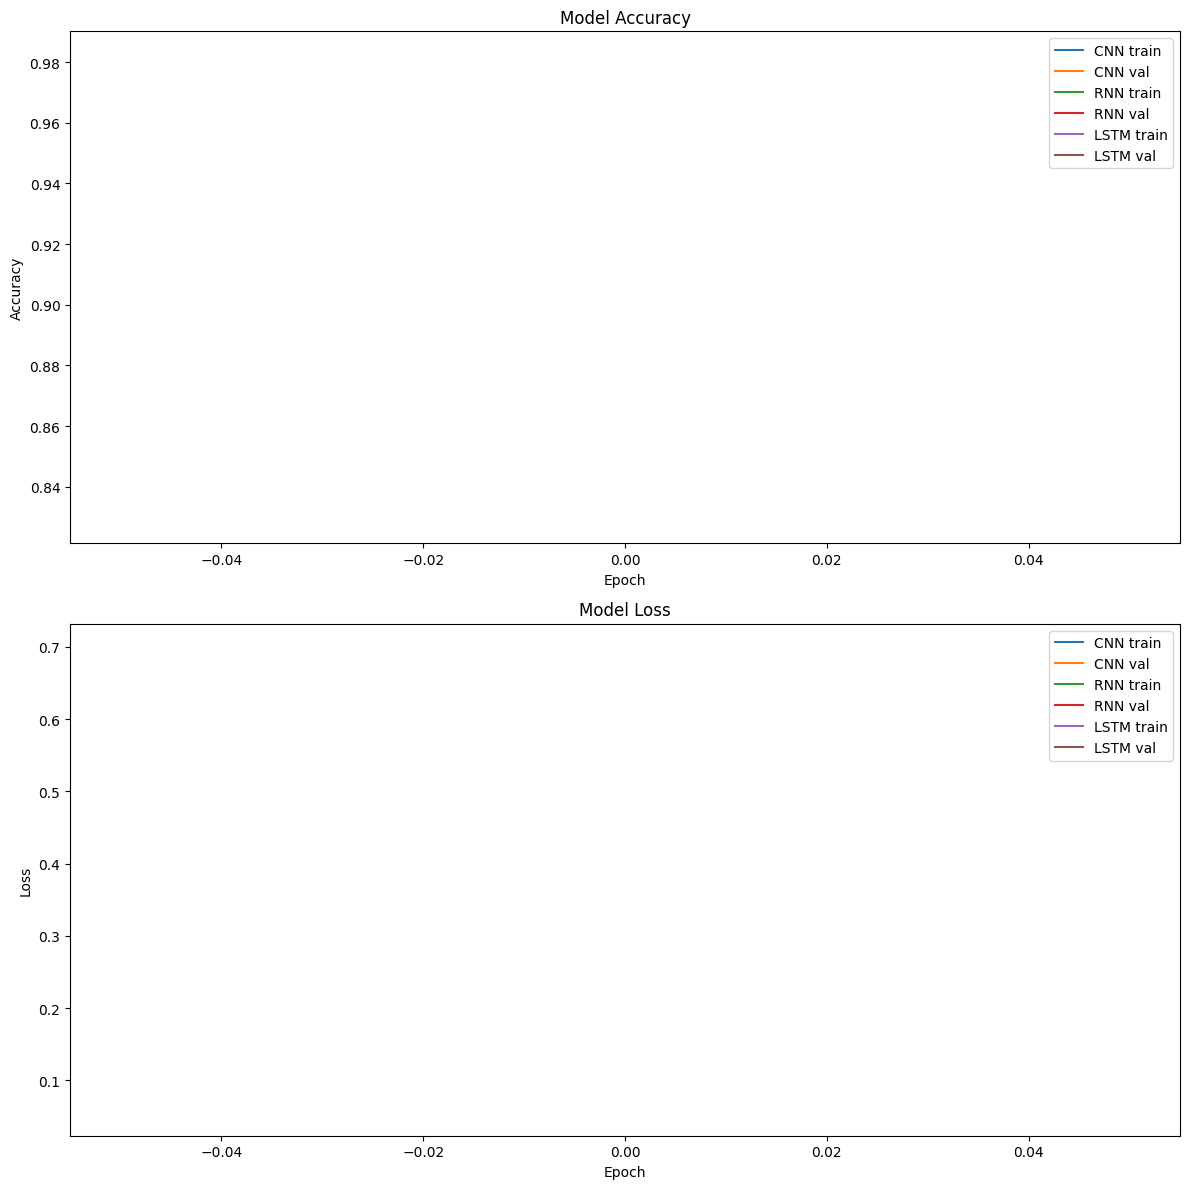

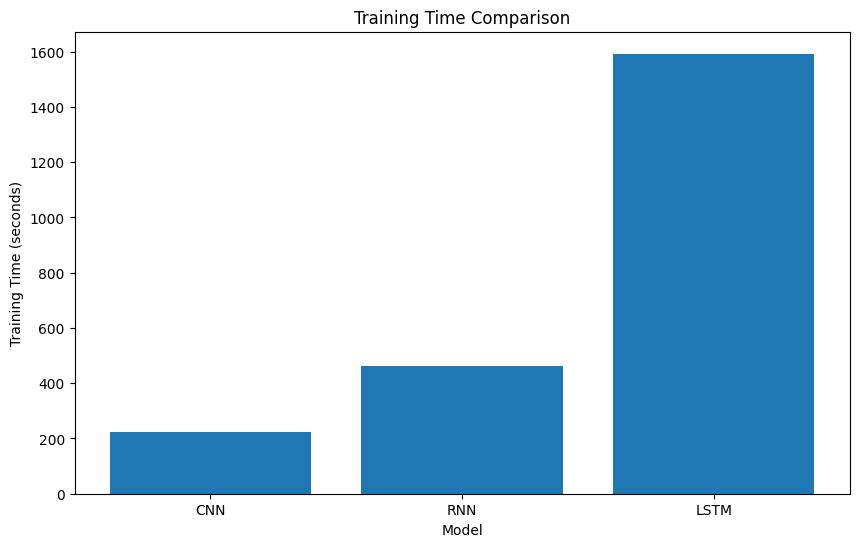

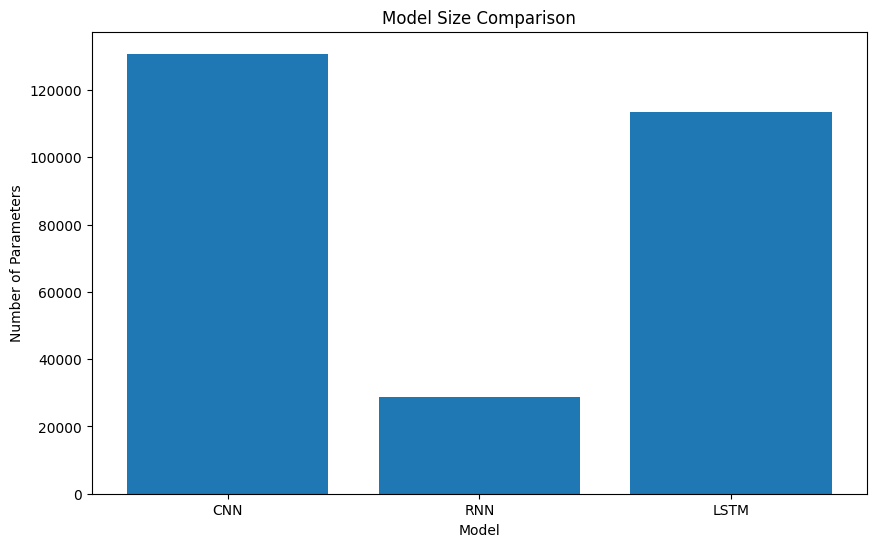

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


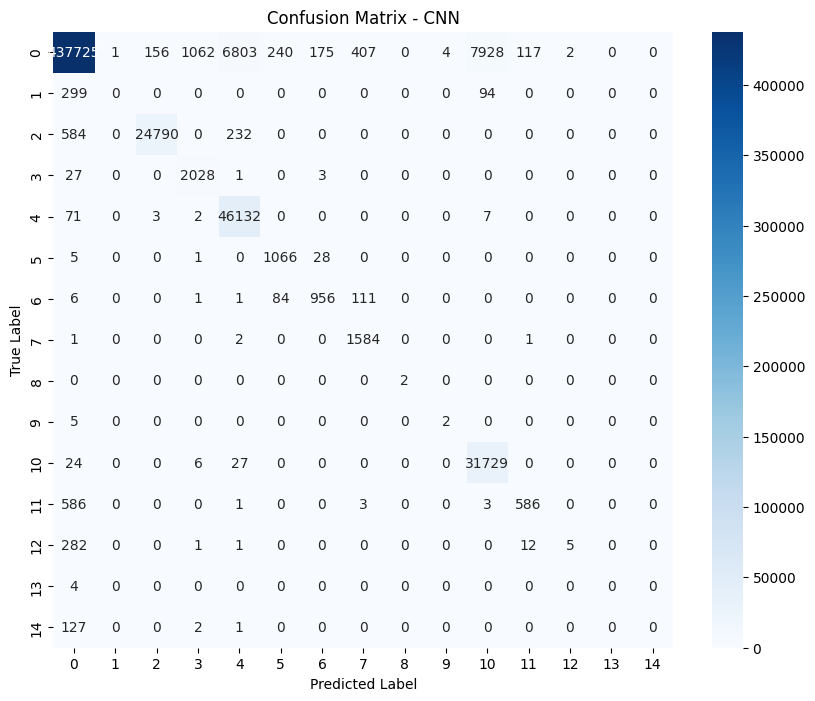

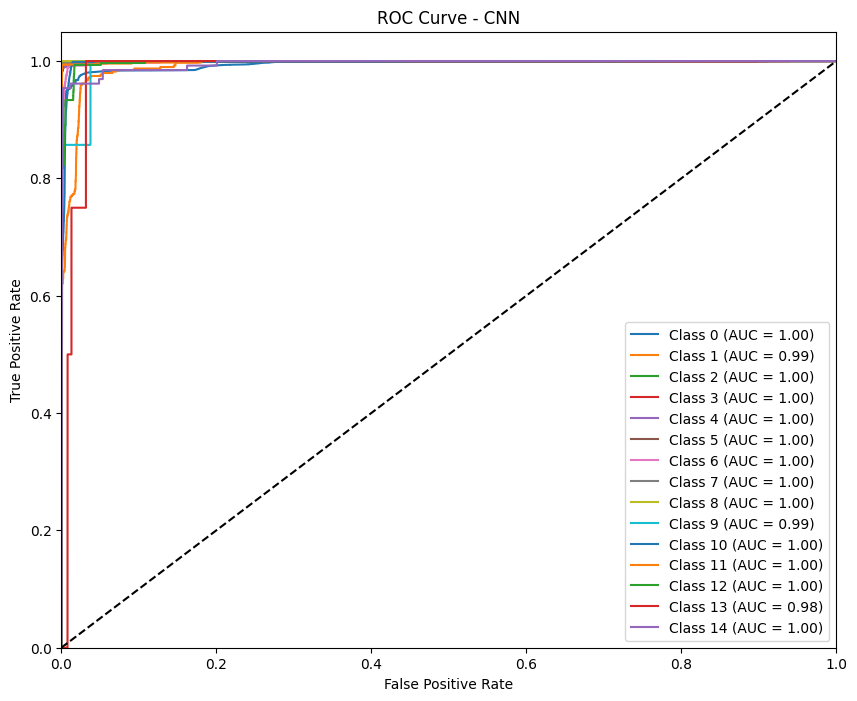

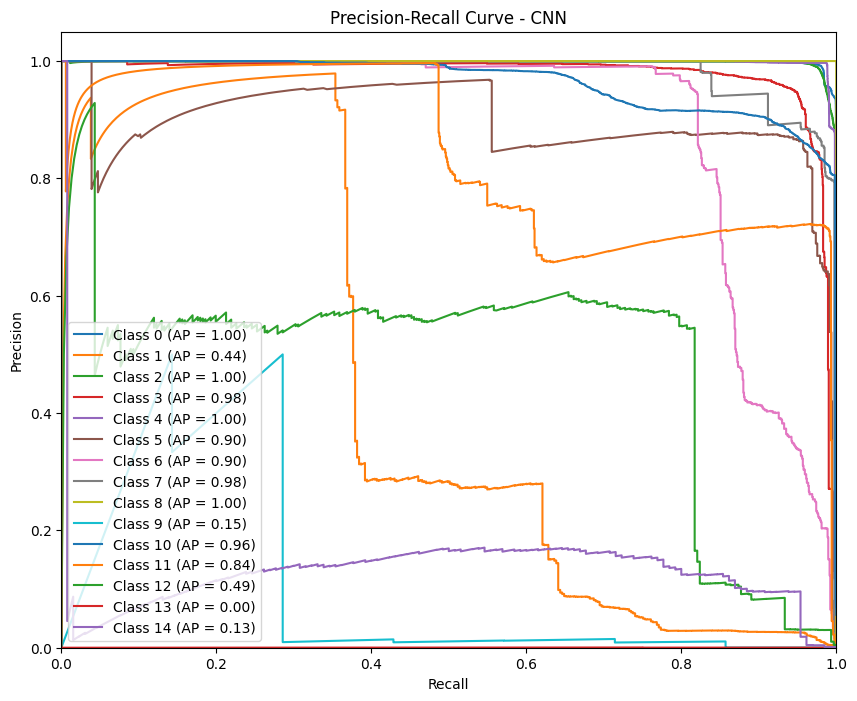

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


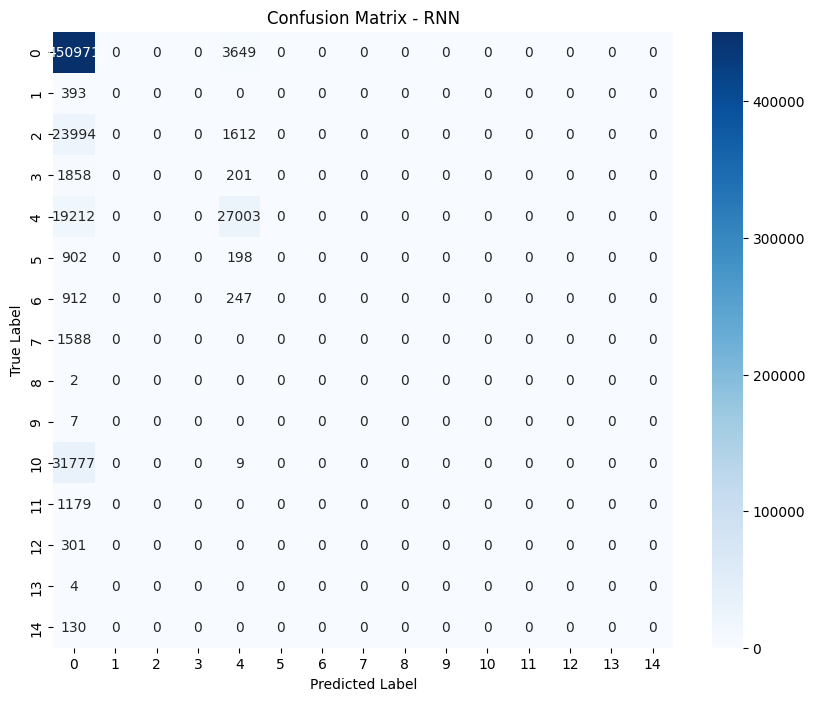

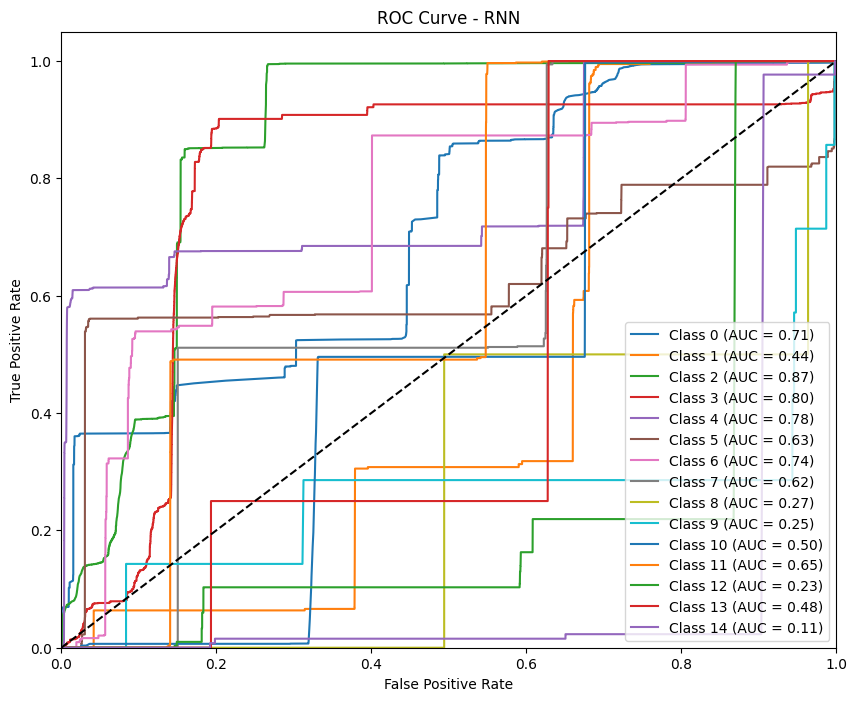

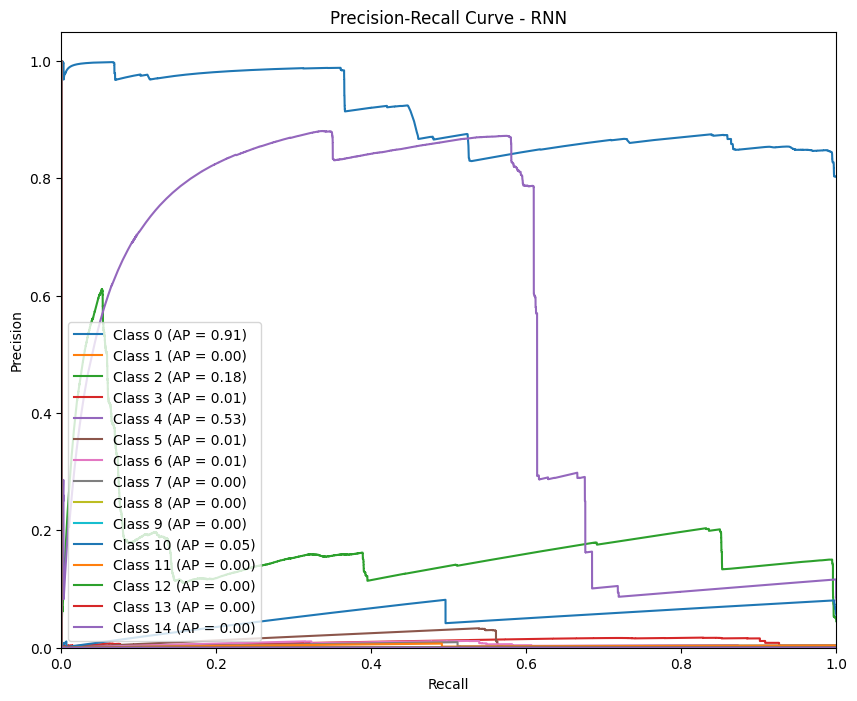

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


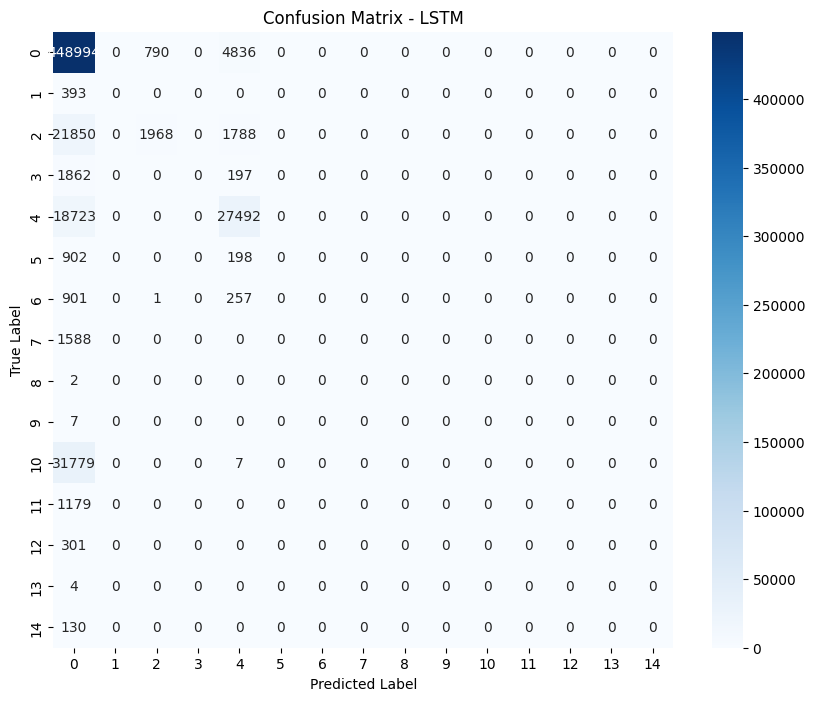

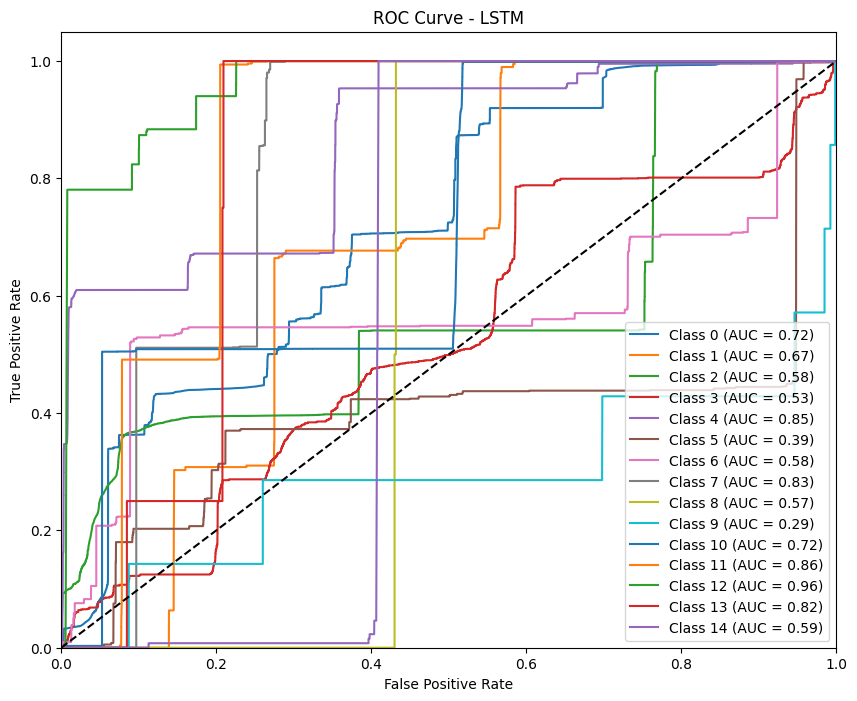

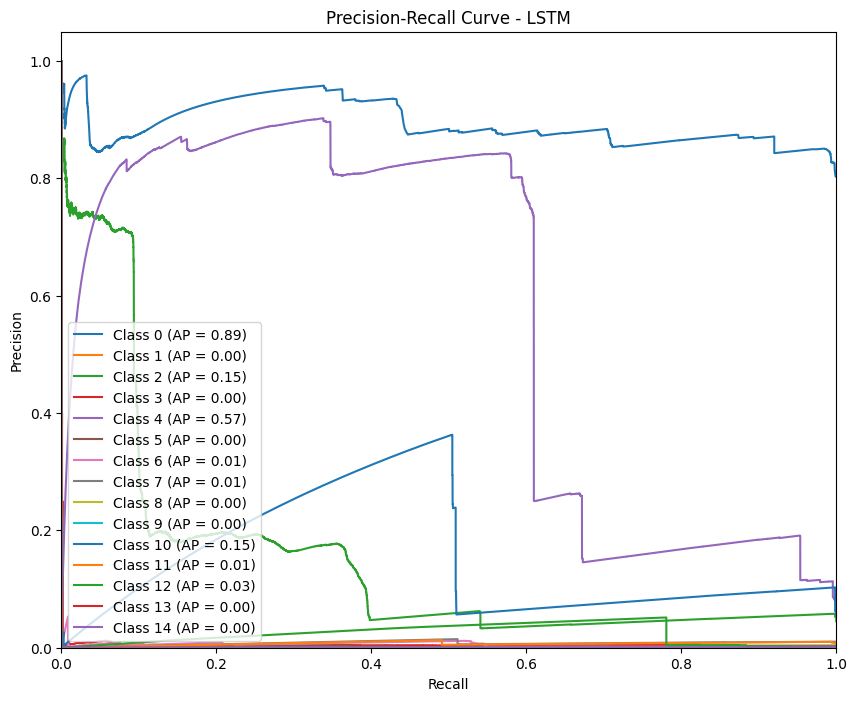

17693/17693 [==============================] - 62s 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


17693/17693 [==============================] - 228s 13ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


17693/17693 [==============================] - 590s 33ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance Metrics Table:
  Model  Accuracy  Precision    Recall  F1 Score
0   CNN  0.965479   0.969594  0.965479  0.965858
1   RNN  0.844255   0.746089  0.844255  0.788881
2  LSTM  0.845103   0.778850  0.845103  0.795078


In [ ]:
import os
import logging
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler, label_binarize
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

# Log setting
logging.basicConfig(format="%(asctime)s %(levelname)s %(message)s", datefmt="%H:%M:%S", level=logging.INFO)

# Change display.max_rows to show all features.
pd.set_option("display.max_rows", 85)

PROCESSED_DIR_PATH = "/content/drive/My Drive/CICIDS2017/ProcessedDataset"
MODEL_DIR_PATH = "/content/drive/My Drive/CICIDS2017/Model"

def preprocessing(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    # Shuffle the dataset
    df = df.sample(frac=1)

    # Split features and labels
    x = df.iloc[:, df.columns != 'Label']
    y = df[['Label']].to_numpy()

    # Scale the features between 0 ~ 1
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)

    return x, y

def reshape_dataset_cnn(x: np.ndarray) -> np.ndarray:
    # Add padding columns
    result = np.zeros((x.shape[0], 81))
    result[:, :-3] = x

    # Reshaping dataset
    result = np.reshape(result, (result.shape[0], 9, 9))
    result = result[..., tf.newaxis]
    return result

def reshape_dataset_rnn(x: np.ndarray) -> np.ndarray:
    # Reshape to (samples, time steps, features)
    return np.reshape(x, (x.shape[0], x.shape[1], 1))

def plot_history(histories):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

    for name, history in histories.items():
        ax1.plot(history.history['sparse_categorical_accuracy'], label=f'{name} train')
        ax1.plot(history.history['val_sparse_categorical_accuracy'], label=f'{name} val')
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend()

    for name, history in histories.items():
        ax2.plot(history.history['loss'], label=f'{name} train')
        ax2.plot(history.history['val_loss'], label=f'{name} val')
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend()

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_roc_curve(y_true, y_pred_proba, model_name):
    n_classes = y_pred_proba.shape[1]
    y_test_bin = label_binarize(y_true, classes=range(n_classes))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(y_true, y_pred_proba, model_name):
    n_classes = y_pred_proba.shape[1]
    y_test_bin = label_binarize(y_true, classes=range(n_classes))

    precision = dict()
    recall = dict()
    average_precision = dict()

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
        average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_proba[:, i])

    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:.2f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc="lower left")
    plt.show()

def evaluation(models, x_test, y_test):
    for name, model in models.items():
        score = model.evaluate(x_test[name], y_test, verbose=False)
        logging.info(f'{name} Evaluation:\nLoss: {score[0]}\nAccuracy: {score[1]}\n')

        # Predictions
        y_pred = model.predict(x_test[name], batch_size=1024, verbose=False)
        y_pred_classes = np.argmax(y_pred, axis=1)

        # Classification Report
        logging.info(f"{name} Classification Report:\n{classification_report(y_test, y_pred_classes)}\n")

        # Confusion Matrix
        plot_confusion_matrix(y_test, y_pred_classes, name)

        # ROC Curve
        plot_roc_curve(y_test, y_pred, name)

        # Precision-Recall Curve
        plot_precision_recall_curve(y_test, y_pred, name)

def create_performance_table(models, x_test, y_test):
    results = []
    for name, model in models.items():
        y_pred = model.predict(x_test[name])
        y_pred_classes = np.argmax(y_pred, axis=1)

        accuracy = accuracy_score(y_test, y_pred_classes)
        precision = precision_score(y_test, y_pred_classes, average='weighted')
        recall = recall_score(y_test, y_pred_classes, average='weighted')
        f1 = f1_score(y_test, y_pred_classes, average='weighted')

        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

    return pd.DataFrame(results)

def create_cnn_model() -> tf.keras.Model:
    inputs = tf.keras.layers.Input(shape=(9, 9, 1))
    x = tf.keras.layers.Conv2D(120, 2, activation='relu', padding="same")(inputs)
    x = tf.keras.layers.Conv2D(60, 3, activation='relu', padding="same")(x)
    x = tf.keras.layers.Conv2D(30, 4, activation='relu', padding="same")(x)
    x = tf.keras.layers.Flatten()(x)
    outputs = tf.keras.layers.Dense(15, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name='cnn')

    model.compile(loss='sparse_categorical_crossentropy',
                  metrics=['sparse_categorical_accuracy'],
                  optimizer='adam')

    return model

def create_rnn_model() -> tf.keras.Model:
    model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(120, input_shape=(78, 1), return_sequences=True),
        tf.keras.layers.SimpleRNN(60, return_sequences=True),
        tf.keras.layers.SimpleRNN(30),
        tf.keras.layers.Dense(15, activation='softmax')
    ], name='rnn')

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['sparse_categorical_accuracy'])
    return model

def create_lstm_model() -> tf.keras.Model:
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(120, input_shape=(78, 1), return_sequences=True),
        tf.keras.layers.LSTM(60, return_sequences=True),
        tf.keras.layers.LSTM(30),
        tf.keras.layers.Dense(15, activation='softmax')
    ], name='lstm')

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['sparse_categorical_accuracy'])
    return model

# Load and preprocess data
df_train = pd.read_csv(os.path.join(PROCESSED_DIR_PATH, 'train_MachineLearningCVE.csv'), skipinitialspace=True)
df_test = pd.read_csv(os.path.join(PROCESSED_DIR_PATH, 'test_MachineLearningCVE.csv'), skipinitialspace=True)

logging.info("Train class distribution\n{}".format(df_train.Label.value_counts()))
logging.info("Test class distribution\n{}".format(df_test.Label.value_counts()))

X_train, Y_train = preprocessing(df_train)
X_test, Y_test = preprocessing(df_test)

# Create models
cnn_model = create_cnn_model()
rnn_model = create_rnn_model()
lstm_model = create_lstm_model()

models = {
    'CNN': cnn_model,
    'RNN': rnn_model,
    'LSTM': lstm_model
}

# Print model summaries
for name, model in models.items():
    logging.info(f"{name} Model Summary:")
    model.summary()
    plot_model(model, show_shapes=True, to_file=f'{name}_model.png')

# Prepare data for each model
X_train_cnn = reshape_dataset_cnn(X_train)
X_test_cnn = reshape_dataset_cnn(X_test)

X_train_rnn = reshape_dataset_rnn(X_train)
X_test_rnn = reshape_dataset_rnn(X_test)

# Training
logging.info("*** TRAINING START ***")

histories = {}
training_times = {}

for name, model in models.items():
    logging.info(f"Training {name} model")
    if name == 'CNN':
        X_train_model = X_train_cnn
        X_test_model = X_test_cnn
    else:
        X_train_model = X_train_rnn
        X_test_model = X_test_rnn

    checkpoint = ModelCheckpoint(
        os.path.join(MODEL_DIR_PATH, f"{name}_weights-improvement-{{epoch:02d}}-{{val_sparse_categorical_accuracy:.2f}}.hdf5"),
        monitor='val_sparse_categorical_accuracy',
        verbose=1,
        save_best_only=True,
        mode='max'
    )

    start_time = time.time()
    history = model.fit(
        X_train_model, Y_train,
        validation_split=0.1,
        epochs=1,  # Reduced for demonstration, increase as needed
        batch_size=1024,
        verbose=1,
        callbacks=[checkpoint]
    )
    end_time = time.time()

    histories[name] = history
    training_times[name] = end_time - start_time

    # Save the model
    model.save(os.path.join(MODEL_DIR_PATH, f"{name}_model.h5"))

logging.info("*** TRAINING FINISH ***")

# Plot training history
plot_history(histories)

# Visualize training times
plt.figure(figsize=(10, 6))
plt.bar(training_times.keys(), training_times.values())
plt.title('Training Time Comparison')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.show()

# Model Size Comparison
model_sizes = {name: model.count_params() for name, model in models.items()}

plt.figure(figsize=(10, 6))
plt.bar(model_sizes.keys(), model_sizes.values())
plt.title('Model Size Comparison')
plt.xlabel('Model')
plt.ylabel('Number of Parameters')
plt.show()

# Evaluation
logging.info("*** EVALUATION START ***")
x_test = {
    'CNN': X_test_cnn,
    'RNN': X_test_rnn,
    'LSTM': X_test_rnn
}
evaluation(models, x_test, Y_test)
logging.info("*** EVALUATION FINISH ***")

# Performance Metrics Table
performance_table = create_performance_table(models, x_test, Y_test)
print("Performance Metrics Table:")
print(performance_table)

logging.info("*** END ***")

MODEL

In [ ]:
import os
import logging
import pandas as pd
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

# Log setting
logging.basicConfig(format="%(asctime)s %(levelname)s %(message)s", datefmt="%H:%M:%S", level=logging.INFO)

# Change display.max_rows to show all features.
pd.set_option("display.max_rows", 85)

# Directory paths
PROCESSED_DIR_PATH = "/content/drive/My Drive/CICIDS2017/ProcessedDataset"
MODEL_DIR_PATH = "/content/drive/My Drive/CICIDS2017/Model"

# Data preprocessing function
def preprocessing(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    # Shuffle the dataset
    df = df.sample(frac=1)

    # Split features and labels
    x = df.iloc[:, df.columns != 'Label']
    y = df[['Label']].to_numpy()

    # Scale the features between 0 ~ 1
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)

    return x, y

# Plot training history
def plot_history(history: tf.keras.callbacks.History):
    # Summarize history for accuracy
    plt.plot(history.history['sparse_categorical_accuracy'])
    plt.plot(history.history['val_sparse_categorical_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Model evaluation function
def evaluation(model: keras.Model, x_test: np.ndarray, y_test: np.ndarray):
    score = model.evaluate(x_test, y_test, verbose=False)
    logging.info('Evaluation:\nLoss: {}\nAccuracy : {}\n'.format(score[0], score[1]))

    # F1 score
    y_pred = model.predict(x_test, batch_size=1024, verbose=False)
    y_pred = np.argmax(y_pred, axis=1)

    logging.info("\n{}".format(classification_report(y_test, y_pred)))

# Create callbacks function
def create_callbacks(model_dir_path):
    checkpoint_path = os.path.join(model_dir_path, "best_model.h5")
    log_dir = os.path.join(model_dir_path, "logs")

    checkpoint = ModelCheckpoint(
        checkpoint_path,
        monitor='val_loss',
        save_best_only=False,
        save_weights_only=False,  # Save entire model (architecture, weights, optimizer state)
        mode='min',
        verbose=1
    )

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        mode='min',
        verbose=1
    )

    tensorboard = TensorBoard(
        log_dir=log_dir,
        histogram_freq=1
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=0.0001,
        verbose=1
    )

    return [checkpoint, early_stopping, tensorboard, reduce_lr]

# Create dense model function
def create_dense_model() -> keras.Model:
    # Creating layers
    inputs = keras.layers.Input(shape=(78, ))
    x = keras.layers.Dense(128, activation='relu')(inputs)
    x = keras.layers.Dense(64, activation='relu')(x)
    x = keras.layers.Dense(32, activation='relu')(x)
    outputs = keras.layers.Dense(15, activation='softmax')(x)
    dense_model = keras.Model(inputs=inputs, outputs=outputs)

    dense_model.compile(loss='sparse_categorical_crossentropy',
                        metrics=['sparse_categorical_accuracy'],
                        optimizer='adam')

    return dense_model

# Load the model if a checkpoint exists
checkpoint_path = os.path.join(MODEL_DIR_PATH, "best_model.h5")
initial_epoch = 0

if os.path.exists(checkpoint_path):
    model = load_model(checkpoint_path)
    logging.info("Loaded model from checkpoint.")
else:
    model = create_dense_model()
    logging.info(model.summary())
    plot_model(model, show_shapes=True)

logging.info("*** MODEL READY ***")

# Training
df = pd.read_csv(os.path.join(PROCESSED_DIR_PATH, 'train_MachineLearningCVE.csv'), skipinitialspace=True)
logging.info("Class distribution\n{}".format(df.Label.value_counts()))
X, y = preprocessing(df)
del df

# Create callbacks
callbacks = create_callbacks(MODEL_DIR_PATH)

logging.info("*** TRAINING START ***")
history = model.fit(
    X, y,
    validation_split=0.1,
    epochs=125,
    batch_size=1024,
    callbacks=callbacks,
    verbose=True,
    initial_epoch=initial_epoch  # Start training from the last saved epoch
)

logging.info("*** TRAINING FINISH ***")
del X, y

# Save the model (optional since ModelCheckpoint saves the model)
model.save(os.path.join(MODEL_DIR_PATH, "05_dense_final.h5"))

plot_history(history)

# Evaluation
df = pd.read_csv(os.path.join(PROCESSED_DIR_PATH, 'train_MachineLearningCVE.csv'), skipinitialspace=True)
logging.info("Class distribution\n{}".format(df.Label.value_counts()))

X, y = preprocessing(df)
del df

evaluation(model, X, y)
del X, y

logging.info("*** END ***")
